# Detect Car in Image:


In [ ]:
# !pip uninstall tensorflow
# !pip uninstall keras

In [ ]:
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.2.5

     |████████████████████████████████| 411.5 MB 8.0 kB/s 
     |████████████████████████████████| 3.8 MB 39.0 MB/s 
     |████████████████████████████████| 503 kB 44.3 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b21f139729d01bad6b70512bd5f9956b88a17c51356fdce8e66ba7015a772d88
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

In [ ]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 4.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.2.2 which is incompatible.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.5 which is incompatible.
tensorflow 2.6.0 requires tensorboard~=2.6, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.6.0 requires tensorflow-estimator~=2.6, but you have tensorflow-estimator 1.15.1 which is incompatible.


In [ ]:
import tensorflow
import keras
print("tensorflow version:", tensorflow.__version__)
print("keras version:",keras.__version__)

tensorflow version: 1.15.0
keras version: 2.2.5


Using TensorFlow backend.


In [ ]:
import json
from IPython.display import Image, display, clear_output
import os
import numpy as np
from collections import Counter
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.data_utils import get_file
from keras.models import Sequential, load_model,Model
import h5py
import skimage

In [ ]:

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [ ]:
img=load_img('/content/drive/MyDrive/car damage detection/img/1.jpg',target_size=(224,224))


x= img_to_array(img)
x= np.expand_dims(x,axis=0)
# x= preprocess_input(x)


In [ ]:
vgg16 = VGG16(weights="imagenet")
preds = vgg16.predict(preprocess_input(x))
print(decode_predictions(preds))





553467904/553467096 [==============================] - 22s 0us/step






40960/35363 [==================================] - 0s 0us/step
[[('n03770679', 'minivan', 0.22047748), ('n03791053', 'motor_scooter', 0.16300583), ('n03769881', 'minibus', 0.10939812), ('n03100240', 'convertible', 0.08751632), ('n03930630', 'pickup', 0.077504925)]]


In [ ]:
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results


In [ ]:
  ## Using vgg16 model
  from collections import defaultdict
  def get_car_categories():
      d = defaultdict(float)
      img_list = os.listdir('/content/drive/MyDrive/car damage detection/img')
      for i, img_path in enumerate(img_list):
          img = prepare_image('/content/drive/MyDrive/car damage detection/img/'+img_path)
          out = vgg16.predict(img)
          preds = get_predictions(out,top=5)
          for pred in preds[0]:
              d[pred[0:2]]+=pred[2]
          if(i%50==0):
              print(i,'/',len(img_list),'complete')
      return Counter(d)

In [ ]:

def prepare_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
from collections import Counter
categ_count= get_car_categories()

0 / 70 complete
50 / 70 complete


In [ ]:
  def is_a_car(image,categ_list):
      img= prepare_image(image)

      out = vgg16.predict(img)
      preds = get_predictions(out, top=5)
      print("Identifying...")
      for pred in preds[0]:
          if pred[0:2] in categ_list:
              print(pred[0:2])
              return True
      return False

# Detect Damage in Car

In [ ]:
model1 = load_model('/content/drive/MyDrive/car-damage-detection-using-CNN/ft_model.h5')


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [ ]:

def is_damaged(image_path,model1):
    # urllib.request.urlretrieve(image_path, 'save.jpg')
    img = load_img(image_path, target_size=(256,256))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)/255
    pred = model1.predict(x)
    #print("Car is Damaged")
    print(pred)
    if(pred[0][0]<=0.5):
      print("Car is Damaged")
      return True
    else:
      print("Car is not Damaged")
      return False

In [ ]:
is_damaged('/content/drive/MyDrive/data1a/validation/01-whole/0001.jpg',model1)

[[1.]]
Car is not Damaged


False

# Detecting Damage in Car

In [ ]:
!pip install mrcnn

     |████████████████████████████████| 51 kB 247 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54930 sha256=a48c500673b4042ee0a1b09b30b60245ab7d608e995f0ea2056c1670a9a45091
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [ ]:
!pip install imgaug

In [ ]:
import keras.engine as KE
KE.Layer

keras.engine.base_layer.Layer

In [ ]:
import mrcnn.model as modellib

In [ ]:

import os
import sys
os.chdir('/content/drive/MyDrive/car-damage-detection-using-CNN')
#ROOT DIRECTORY:
# Root directory 
ROOT_DIR= os.path.abspath("")
sys.path.append(ROOT_DIR) 

from mrcnn.config import Config
from mrcnn import utils
#import mrcnn.model as modellib
from mrcnn import visualize

%matplotlib inline

#directory to save logs and trained model
# To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR,'mask_rcnn_coco.h5')
#DOWnload coco trained weights

if not os.path.exists(COCO_MODEL_PATH):
  utils.download_trained_weights(COCO_MODEL_PATH)

#Directory of images to run detection on
IMAGE_DIR= os.path.join(ROOT_DIR,'images')

In [ ]:
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library

import keras.engine as KE

# from mrcnn import utils
# from mrcnn import visualize
from mrcnn.visualize import display_images
# from keras.layers import Layer
# from mrcnn import model
# # import mrcnn.model as modellib
from mrcnn.model import log
import cv2
import custom,custom_1
import imgaug,h5py,IPython
# KE.Layer
%matplotlib inline

In [ ]:
!ls

 0.jpg			        LICENSE
 1.3.0			        logs
'app (1).ipynb'		        MANIFEST.in
'app (1).py'		        mask_rcnn_coco.h5
 app.ipynb		        maskrcnn_config20210908T1155
 app.py			        model1.pkl
 car_damage_detect.csv	        model2.pkl
'car damage detection'	        model3.pkl
 car_damage_detect_trial.csv    model.pkl
 car_dam_det.py		        mrcnn
 car_detection.py	        mrcnn.zip
'cdd (1).ipynb'		        myenv
 cdd.ipynb		        pipeline.py
 custom			        __pycache__
 custom_1.py		        __pycache__.zip
 custom.py		        README.md
 custom.zip		        requirements.txt
 damage_detection_mrcnn.ipynb   setup.cfg
 damage_identification.py       setup.py
 file.txt		        static
 ft_model.h5		        templates
 images			        training_commandline.txt


In [ ]:
# Root directory of the project
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
custom_WEIGHTS_PATH = "/content/drive/MyDrive/car-damage-detection-using-CNN/logs/scratch20210906T0758/mask_rcnn_scratch_0010.h5"  # TODO: update this path for best performing iteration weights
config = custom.CustomConfig()
custom_DIR = '/content/drive/MyDrive/car-damage-detection-using-CNN/custom/'
custom_DIR

'/content/drive/MyDrive/car-damage-detection-using-CNN/custom/'

In [ ]:
ROOT_DIR

'/content/drive/MyDrive/car-damage-detection-using-CNN'

In [ ]:
config = custom.CustomConfig()
# ROOT_DIR = 'C:/Users/Sourish/Mask_RCNN'
CUSTOM_DIR = os.path.join(ROOT_DIR + "/custom/")
print(CUSTOM_DIR)
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

/content/drive/MyDrive/car-damage-detection-using-CNN/custom/

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE          

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax



In [ ]:
from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)


<module 'mrcnn.visualize' from '/usr/local/lib/python3.7/dist-packages/mrcnn/visualize.py'>

In [ ]:


# Create model in inference mode
# import tensorflow as tf
with tensorflow.device(DEVICE):
  model= modellib.MaskRCNN(mode='inference', model_dir= MODEL_DIR, config= config)



Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:





# load the last best model you trained
# weights_path = model.find_last()[1]
custom_WEIGHTS_PATH = '/content/drive/MyDrive/car-damage-detection-using-CNN/logs/scratch20210906T0758/mask_rcnn_scratch_0010.h5'
# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)    
model.keras_model._make_predict_function()

Loading weights  /content/drive/MyDrive/car-damage-detection-using-CNN/logs/scratch20210906T0758/mask_rcnn_scratch_0010.h5
Re-starting from epoch 10


In [ ]:
# visualize.display_weight_stats(model)

# Deploying model


In [ ]:
#deploy model using flask:
!pip install flask-ngrok

In [ ]:

from skimage import data,io
from flask import render_template, request, Flask, url_for,flash, redirect
from flask_ngrok import run_with_ngrok

from werkzeug.utils import secure_filename
import warnings
app= Flask(__name__)
app= Flask(__name__,static_folder='/content/drive/MyDrive/car-damage-detection-using-CNN/static')
  run_with_ngrok(app)

app.secret_key = "secret key"
UPLOAD_PATH= '/content/drive/MyDrive/car-damage-detection-using-CNN/static/Uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_PATH
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024
Allowed_extensions= ['jpg','jpeg','png']
zipped_extensions=['.zip', '.sitx', '.7z', '.rar',' .gz']

In [ ]:
ROOT_DIR

'/content/drive/MyDrive/car-damage-detection-using-CNN'

In [ ]:
!ls

 0.jpg			        LICENSE
 1.3.0			        logs
'app (1).ipynb'		        MANIFEST.in
'app (1).py'		        mask_rcnn_coco.h5
 app.ipynb		        maskrcnn_config20210908T1155
 app.py			        model1.pkl
 car_damage_detect.csv	        model2.pkl
'car damage detection'	        model3.pkl
 car_damage_detect_trial.csv    model.pkl
 car_dam_det.py		        mrcnn
 car_detection.py	        mrcnn.zip
'cdd (1).ipynb'		        myenv
 cdd.ipynb		        pipeline.py
 custom			        __pycache__
 custom_1.py		        __pycache__.zip
 custom.py		        README.md
 custom.zip		        requirements.txt
 damage_detection_mrcnn.ipynb   setup.cfg
 damage_identification.py       setup.py
 file.txt		        static
 ft_model.h5		        templates
 images			        training_commandline.txt


/content/drive/MyDrive/car-damage-detection-using-CNN/static/prediction/0004.JPEG

In [ ]:
@app.route('/')
def home():
  return render_template('base1.html')
@app.route('/upload',methods=['GET','POST'])
def upload():
  if request.method=='POST':
    fileupload=False
    file = request.files['file']
    if file.filename == '':
        flash('No image selected for uploading')
        return redirect(request.url)
    filename = secure_filename(file.filename)
    file_path= os.path.join(UPLOAD_PATH, filename)
    file.save(file_path)
    print('upload_image filename: ' + filename)
    
    print(file_path)
    image = io.imread(file_path)  
    io.imshow(image)
    plt.show()
    class_names=['BG','Scratch']
    if filename.split('.')[-1].lower() in Allowed_extensions:
      # return render_template("results.html", result="Car", result2="Damaged", fileupload=True)
      # file entered is an image

      
      # check if there is a car in image or not:
      is_car=is_a_car(file_path, categ_count)
      if is_car:
        #check if car is damaged or not
        damaged_car= is_damaged(file_path,model1)
        if damaged_car:
          #car is found damaged now look for damage....
          fileupload=True
          #rescaling image
          if image.ndim != 3:
            image = skimage.color.gray2rgb(image)
        # If has an alpha channel, remove it for consistency
          if image.shape[-1] == 4:
              image = image[..., :3]
          #print(img.shape)
          image, window, scale, padding, crop = utils.resize_image(image,
                                                                min_dim=config.IMAGE_MIN_DIM,
                                                                min_scale=config.IMAGE_MIN_SCALE,
                                                                max_dim=config.IMAGE_MAX_DIM,
                                                                mode=config.IMAGE_RESIZE_MODE)
          print(image.shape)
          #Run Damage detection
          print("Running damage detection")
          img_arr = np.array(image)

          results = model.detect([image], verbose=1)
          ax= get_ax(1)
          ax = plt.gca()
          r = results[0]
          loc= '/content/drive/MyDrive/car-damage-detection-using-CNN/static/prediction'
          visualize.display_instances(img_arr, r['rois'], r['masks'], r['class_ids'],class_names, r['scores'],ax=ax, title='Predictions')
          # get_masks_filenames = visualize.get_masks(filename, r['masks'], r['rois'], class_names, r['class_ids'], path=pred_path + '/')
          # top_masks_filenames = visualize.display_top_masks(img_arr, r['masks'], r['class_ids'], class_names)
          # get_roi_filenames = visualize.get_rois(filename, r['rois'], path=pred_path + '/')
          print("yaha tak sab theek thaak hai!!!!!!!!!!!!!!!!!!!!!!!!")
          # plt.imshow(image)
          plt.savefig(loc+'/'+filename,bbox_inches='tight', pad_inches=-0.5,orientation= 'landscape')
          print("Yaha Bhi sab theek hi hai")
          print("yeeeeaaah file save ho gayi!!!!!")
          # # data={}
          # data['visualize']=file.filename.split('.')[0] + '/' + file.filename
          # data['width']=getwidth(UPLOAD_PATH + file.filename.split('.')[0] + '/' + file.filename)
          # data['masks']=get_masks_filenames
          # data['top_masks']=top_masks_filenames
          # data['roi']=get_roi_filenames


          print("KUch nahi")
          return render_template('damage1.html',filename=filename, fileupload= fileupload,is_car= is_car, damaged_car=damaged_car, output=loc+'/'+file.filename)
        else:
          #car is not damaged
          return render_template('damage1.html',image_path=file_path, fileupload= fileupload,is_car= is_car, damaged_car=False)
      else:
        #there is no car in image
          return render_template('damage1.html',image_path=file_path, fileupload= fileupload,is_car= False, damaged_car=False)

          
    elif filename.split('.')[-1].lower() in zipped_extensions:
      #file entered is a zipped file
      return render_template('results.html',result= "there is a zipped folder",result2= "DOne")
    return render_template('results.html',user_image=file_path)
  return render_template('base1.html')
@app.route('/<filename>')
def display_image(filename):
    print('display_image filename: ' + filename)
    return redirect(url_for('static', filename='uploads/' + filename), code=301)

@app.route('/<imagename>')
def display_prediction(imagename):
    print('predicted_image filename: ' + imagename)
    return redirect(url_for('static', filename='prediction/' + imagename), code=301)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://34b9-35-236-147-193.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [10/Oct/2021 07:34:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2021 07:34:19] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:20] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:20] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:20] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:20] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:20] "GET /assets/js/main.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:21] "GET /static/js/bootstrap.bundle.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2021 07:34:23] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:24] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:24] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:25] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 

display_image filename: favicon.ico


127.0.0.1 - - [10/Oct/2021 07:34:28] "GET /static/uploads/favicon.ico HTTP/1.1" 404 -


upload_image filename: Capture10.PNG
/content/drive/MyDrive/car-damage-detection-using-CNN/static/Uploads/Capture10.PNG


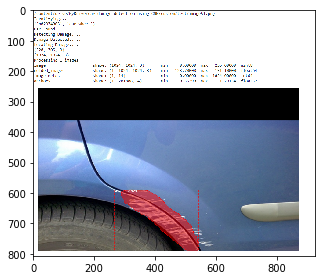

Identifying...


127.0.0.1 - - [10/Oct/2021 07:34:44] "POST /upload HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2021 07:34:45] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:45] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:45] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:45] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:45] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:45] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:46] "GET /assets/js/main.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:46] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:46] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:47] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:34:47] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.

upload_image filename: 0121.png
/content/drive/MyDrive/car-damage-detection-using-CNN/static/Uploads/0121.png


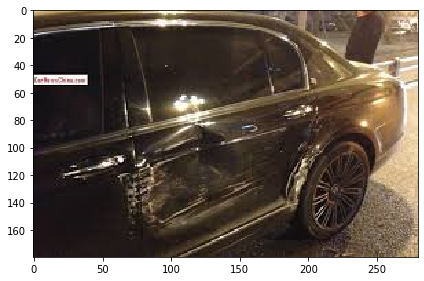

Identifying...
('n03930630', 'pickup')
[[0.]]
Car is Damaged
(1024, 1024, 3)
Running damage detection
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
yaha tak sab theek thaak hai!!!!!!!!!!!!!!!!!!!!!!!!


127.0.0.1 - - [10/Oct/2021 07:35:24] "POST /upload HTTP/1.1" 200 -


Yaha Bhi sab theek hi hai
yeeeeaaah file save ho gayi!!!!!
KUch nahi


127.0.0.1 - - [10/Oct/2021 07:35:25] "GET /0121.png, HTTP/1.1" 301 -
127.0.0.1 - - [10/Oct/2021 07:35:25] "GET /static/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:25] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -


display_image filename: 0121.png,


127.0.0.1 - - [10/Oct/2021 07:35:25] "GET /static/uploads/0121.png%2C HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:25] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:25] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:26] "GET /content/drive/MyDrive/car-damage-detection-using-CNN/static/prediction/0121.png HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:26] "GET /assets/js/jquery.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:26] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:26] "GET /assets/js/util.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:26] "GET /assets/js/main.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:26] "GET /assets/js/jquery.scrolly.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:27] "GET /assets/js/browser.min.js HTTP/1.1" 404 -
127.0.0.1 - - [10/Oct/2021 07:35:27] "GET /assets/js/breakpoints.min.js HTTP/1.1" 404 -
127.0.0.1 - 

In [ ]:

if __name__=="__main__":                                           
    app.run()

In [ ]:
# @app.route('/')
# def home():
#   return render_template('base1.html')
# @app.route('/upload',methods=['GET','POST'])
# def upload():
#   if request.method=='POST':
#     fileupload=False
#     file = request.files['file']
#     if file.filename == '':
#         flash('No image selected for uploading')
#         return redirect(request.url)
#     filename = secure_filename(file.filename)
#     file_path= os.path.join(UPLOAD_PATH, filename)
#     file.save(file_path)
#     print('upload_image filename: ' + file_path)
#     class_names=['BG','Scratch']
#     image = load_img(file_path, target_size= (240,240))

# 		#image = np.array(img)
#     if filename.split('.')[-1].lower() in Allowed_extensions:
#       # return render_template("results.html", result="Car", result2="Damaged", fileupload=True)
#       # file entered is an image
#       # check if there is a car in image or not:
#       is_car=is_a_car(file_path, categ_count)
#       if is_car:
#         #check if car is damaged or not
#         damaged_car= is_damaged(file_path,model1)
#         if damaged_car:
#           #car is found damaged now look for damage....
#           fileupload=True
#           #rescaling image
#           # if image.ndim != 3:
#           #   image = skimage.color.gray2rgb(image)
#         # If has an alpha channel, remove it for consistency
#           # if image.shape[-1] == 4:
#           #     image = image[..., :3]
#           # #print(img.shape)
#           # image, window, scale, padding, crop = utils.resize_image(image,
#           #                                                       min_dim=config.IMAGE_MIN_DIM,
#           #                                                       min_scale=config.IMAGE_MIN_SCALE,
#           #                                                       max_dim=config.IMAGE_MAX_DIM,
#           #                                                       mode=config.IMAGE_RESIZE_MODE)
#           # print(image.shape)
#           #Run Damage detection
#           print("running damage detection")
#           results = model.detect([image], verbose=1)
#           ax= get_ax(1)
#           ax = plt.gca()
#           r = results[0]
#           print("detection done")

#           loc=  os.path.join(ROOT_DIR, "prediction")
#           visualize.save_instances(img_arr, r['rois'], r['masks'], r['class_ids'],class_names, r['scores'],ax=ax, title='Predictions',path= loc+'/'+filename)
#           get_masks_filenames = visualize.get_masks(filename, r['masks'], r['rois'], class_names, r['class_ids'], path=pred_path + '/')
#           top_masks_filenames = visualize.display_top_masks_edit(filename, r['masks'], r['class_ids'], class_names, path=pred_path + '/')
#           get_roi_filenames = visualize.get_rois(filename, r['rois'], path=pred_path + '/')
#           output_image= plt.imread(loc+'/'+filename)
#           print("output image is saved")
#           data={}
#           data['visualize']=f.filename.split('.')[0] + '/' + f.filename
#           data['width']=getwidth(UPLOAD_PATH + f.filename.split('.')[0] + '/' + f.filename)
#           data['masks']=get_masks_filenames
#           data['top_masks']=top_masks_filenames
#           data['roi']=get_roi_filenames
#           return render_template('damage1.html',image_path=file_path, fileupload= fileupload,is_car= is_car, damaged_car=damaged_car,output_image=output_image,data= data)

#         else:
#           #car is not damaged
#           return render_template('damage1.html',image_path=file_path,fileupload= fileupload,is_car= is_car, damaged_car=damaged_car)
#       else:
#         #there is no car in image
#           return render_template('damage1.html',image_path=file_path,fileupload= fileupload,is_car= is_car, damaged_car=damaged_car)

          
#     elif filename.split('.')[-1].lower() in zipped_extensions:
#       #file entered is a zipped file
#       return render_template('results.html',result= "there is a zipped folder",result2= "DOne")
#     return render_template('results.html',user_image=file_path)
#   return render_template('base1.html')